In [4]:
import pandas as pd
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv("housing (task4).csv",delim_whitespace=True,names=names)
df=df.dropna()
print(df.head(6))

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5  0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7

[6 rows x 14 columns]


In [5]:
array=df.values
x=array[:,:13]
y=array[:,13]

In [30]:
import numpy
from numpy import set_printoptions
from numpy import arange
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rX=scaler.fit_transform(x)
set_printoptions(precision=3)
print(rX[0:1,:])

[[0.    0.18  0.068 0.    0.315 0.578 0.642 0.269 0.    0.208 0.287 1.
  0.09 ]]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler().fit(x)
rX1=scaler1.fit_transform(x)
set_printoptions(precision=3)
print(rX1[0:1,:])

[[-0.42   0.285 -1.288 -0.273 -0.144  0.414 -0.12   0.14  -0.983 -0.667
  -1.459  0.441 -1.076]]


In [62]:
from sklearn.model_selection import train_test_split
validation_size=0.20
seed=5
x_train,x_validation,y_train,y_validation=train_test_split(rX,y,test_size=validation_size,random_state=seed)

In [63]:

num_folds=5
seed=2
scoring='r2'

In [64]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
models=[]
models.append(('SVR',SVR()))

models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('EN',ElasticNet()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('LASSO',Lasso()))
results=[]
names=[]
for name,model in models:
   kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
   cv_results=cross_val_score (model,x_train,y_train,cv=kfold,scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
   print(msg)


SVR 0.561781 (0.115403)
LR 0.704408 (0.063476)
KNN 0.654417 (0.073928)
EN 0.130821 (0.025094)
CART 0.708823 (0.103131)
LASSO 0.222805 (0.035275)


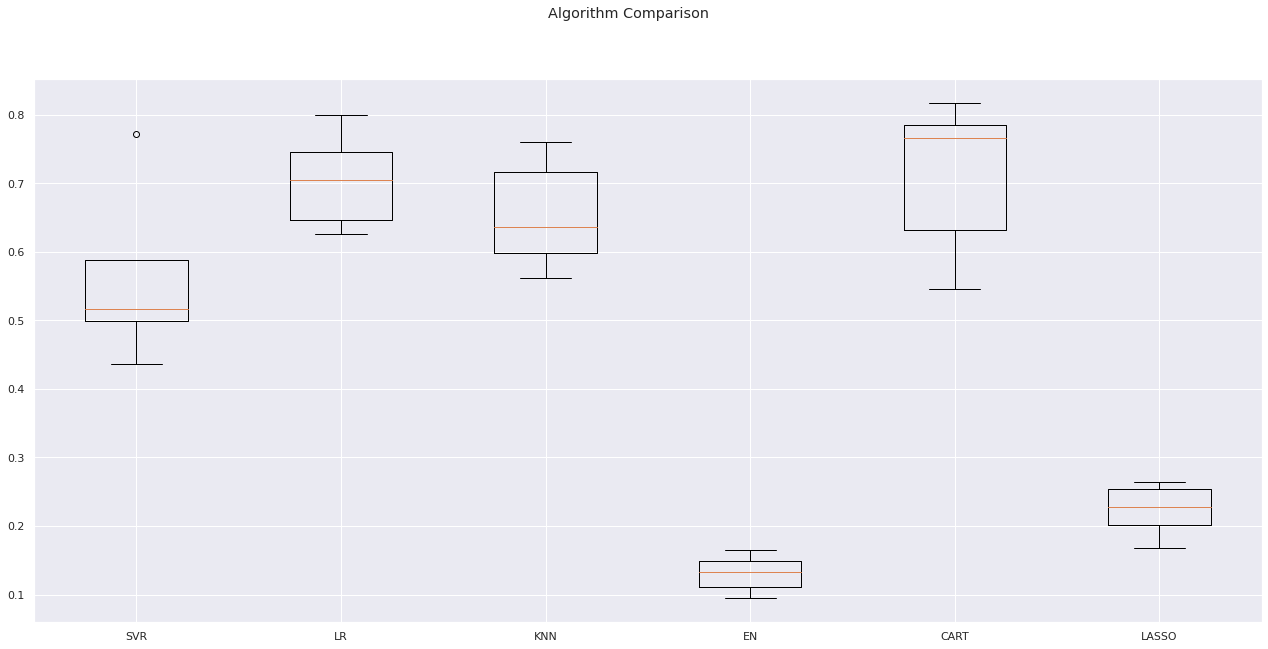

In [75]:
import matplotlib.pyplot as pyplot
figure=pyplot.figure()
figure.suptitle('Algorithm Comparison')
ax=figure.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

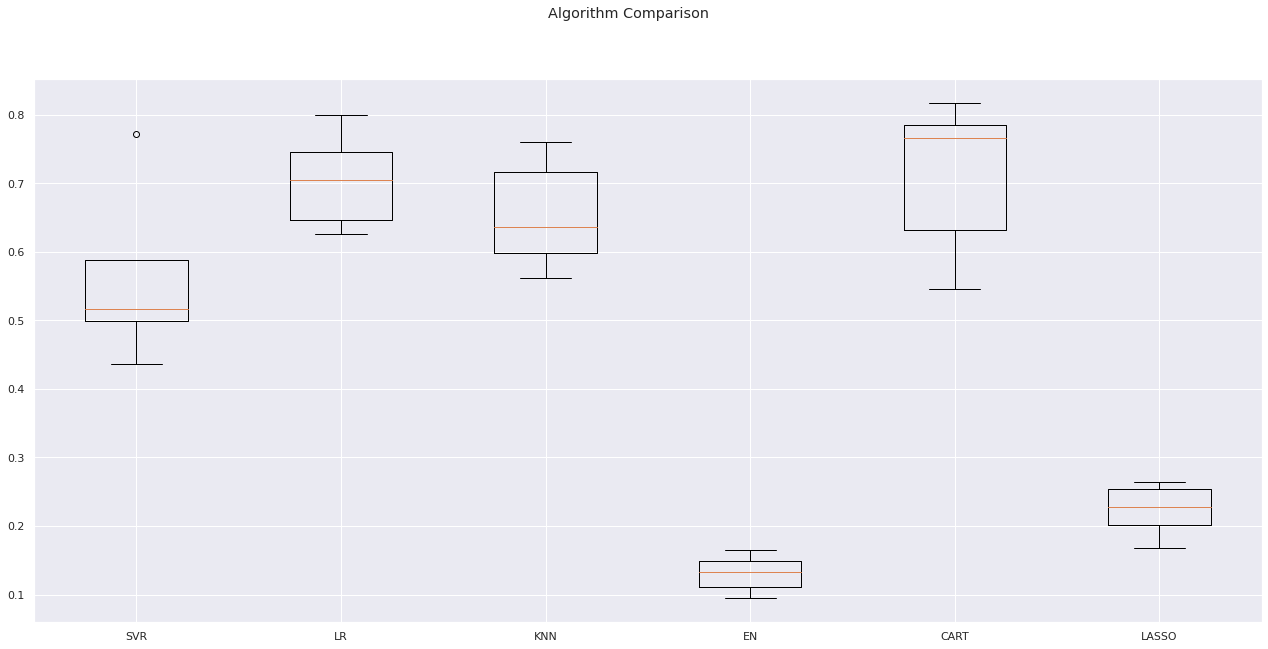

In [77]:
import matplotlib.pyplot as pyplot
figure=pyplot.figure()
figure.suptitle('Algorithm Comparison')
ax=figure.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [71]:
model = KNeighborsRegressor()
model.fit(x_train,y_train)
predictions=model.predict(x_validation)
print(r2_score(y_validation,predictions))

0.7440462184800187


In [72]:
model = ElasticNet()
model.fit(x_train,y_train)
predictions=model.predict(x_validation)
print(r2_score(y_validation,predictions))

0.1683395501143199


In [66]:
from sklearn.metrics import mean_squared_error,r2_score
model=DecisionTreeRegressor(max_depth=20)
model.fit(x_train,y_train)
predictions=model.predict(x_validation)
print(r2_score(y_validation,predictions))


0.606744304331291


In [69]:
model = LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_validation)
print(r2_score(y_validation,predictions))


0.7334492147453071


In [67]:
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
model=GradientBoostingRegressor(random_state=seed,n_estimators=100)
model.fit(rescaledx,y_train)
rescaledValidationx=scaler.transform(x_validation)
predictions=model.predict(rescaledValidationx)
print(r2_score(y_validation,predictions))

0.8830230697903091


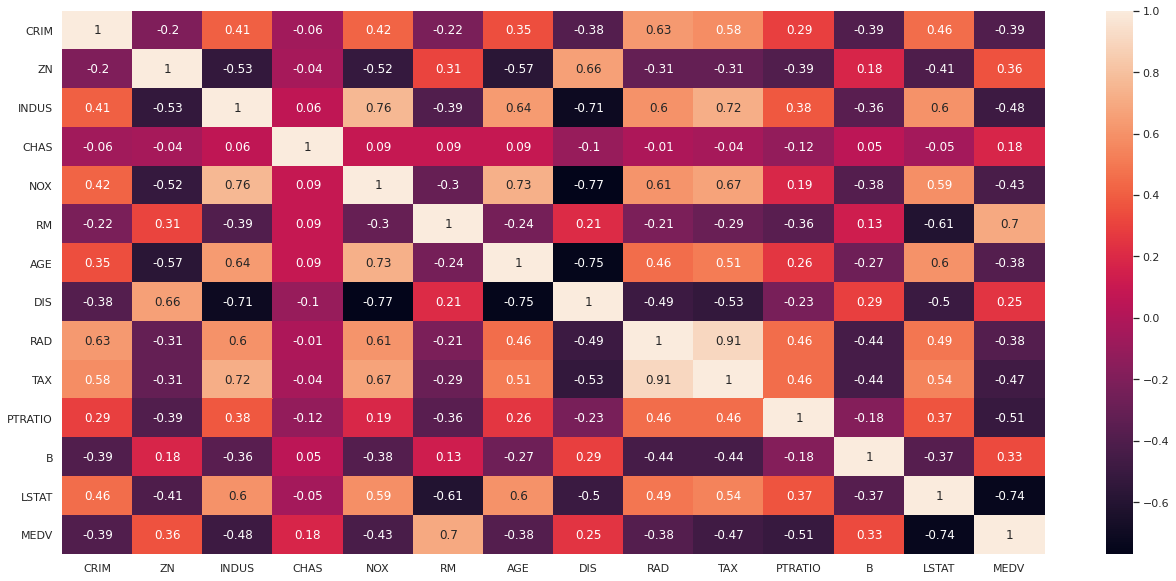

In [61]:
import seaborn as sns
correlation_matrix=df.corr().round(2)
sns.set(rc={'figure.figsize':(22,10)})
sns.heatmap(data=correlation_matrix,annot=True)